In [31]:
import json
import numpy as np
import pandas as pd
import collections

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from collections import Counter
pd.options.display.max_colwidth = 110

In [5]:
df = pd.read_json('../train.json').set_index('id')
df_test = pd.read_json('../test.json').set_index('id')
df.head(10)
df['cuisine'].unique()
df['cuisine'].value_counts()
df[df['ingredients'].str.len() < 2]

,cuisine,ingredients
id,,
4734,japanese,[sushi rice]
7833,vietnamese,[dried rice noodles]
36818,indian,[plain low-fat yogurt]
19772,indian,[unsalted butter]
16116,japanese,[udon]
29738,thai,[sticky rice]
41124,indian,[butter]
32631,mexican,[corn tortillas]
29570,thai,[grained]


Text(0.5, 1.0, 'Cuisines')

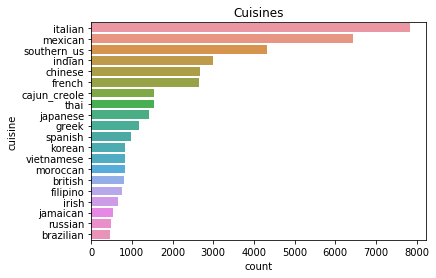

In [6]:
sns.countplot(y='cuisine', order=df['cuisine'].value_counts().reset_index()['index'], data=df)
plt.title("Cuisines")

Text(0.5, 1.0, 'Number of ingredients')

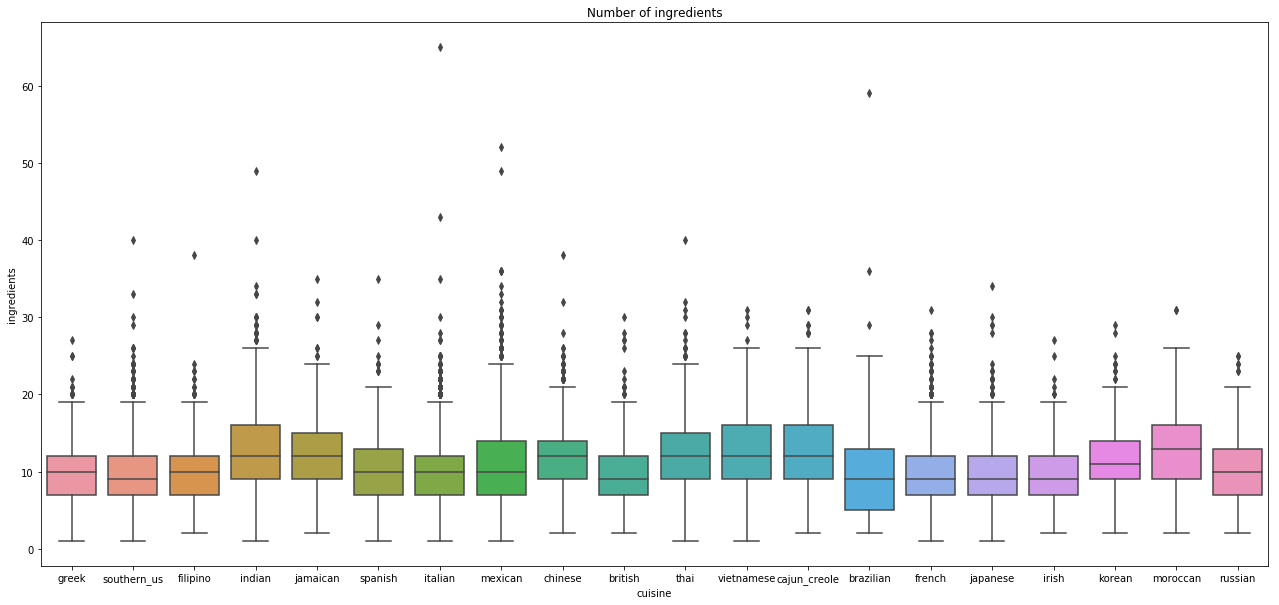

In [7]:
sns.boxplot(x='cuisine', y=df['ingredients'].str.len(), data=df)
plt.gcf().set_size_inches(22, 10)
plt.title('Number of ingredients')

Text(0.5, 1.0, 'Most common ingredients')

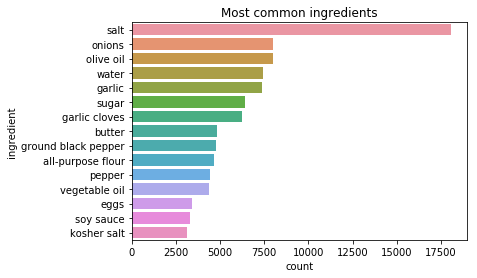

In [8]:
ingredients = [item for sublist in df['ingredients'] for item in sublist]
counter = Counter(ingredients)
top_ingredients = counter.most_common(15)
df_ingredients = pd.DataFrame(top_ingredients, columns=['ingredient', 'count'])
sns.barplot(y='ingredient', x='count', data=df_ingredients)
plt.title('Most common ingredients')

In [9]:
df = df.drop(df[df['ingredients'].str.len() < 2].index, axis=0)
df = df.drop(df[df['ingredients'].str.len() > 30].index, axis=0)

In [10]:
dfX = df['ingredients'].str.join(' ').str.lower()
dfX_test = df_test['ingredients'].str.join(' ').str.lower()

In [11]:
dfy = df['cuisine']
lbe = LabelEncoder()
y = lbe.fit_transform(dfy.values)

In [12]:
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(dfX.values)
X_test = tfidf.transform(dfX_test.values)

In [14]:
clf = SVC(C=100, 
          kernel='rbf', 
          degree=3, 
          gamma=1, 
          coef0=1, 
          shrinking=True, 
          tol=0.001,  
          probability=False, 
          cache_size=200, 
          class_weight=None,  
          verbose=False,  
          max_iter=-1,
          decision_function_shape=None, 
          random_state=None)

clf.fit(X, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
y_test = clf.predict(X_test)
y_pred = lbe.inverse_transform(y_test)
cross_val_score(clf, X, y, cv=3)

array([0.80391121, 0.79888184, 0.80479141])

In [21]:
sub = pd.DataFrame({'id':df_test.index, 'cuisine':y_pred})
sub.to_csv('cuisine_output.csv', index=False)

In [28]:
trainrecipts = json.load(open('../train.json','r', encoding='UTF8'))

In [29]:
raw_ingredients = list()

for recipt in trainrecipts:
    for ingredient in recipt[u'ingredients']:
        raw_ingredients.append(ingredient.strip())
        

raw_cuisines = list()
for recipt in trainrecipts:
    raw_cuisines.append(recipt[u'cuisine'].strip())

In [32]:
counts_ingr = collections.Counter(raw_ingredients)
counts_cuis = collections.Counter(raw_cuisines)

In [33]:
print('Size Ingredients dataset (with repetition):  \t{}'.format((len(raw_ingredients))))
print('Unique Ingredients dataset: \t\t\t{}'.format((len(counts_ingr.values()))))


print('Total # of recipts \t\t\t\t{}'.format(len(raw_cuisines)))
print('Total # of Cuisines \t\t\t\t{}'.format((len(counts_cuis.values()))))

Size Ingredients dataset (with repetition):  	428275
Unique Ingredients dataset: 			6714
Total # of recipts 				39774
Total # of Cuisines 				20


In [34]:
counts_cuis.most_common(10)

[('italian', 7838),
 ('mexican', 6438),
 ('southern_us', 4320),
 ('indian', 3003),
 ('chinese', 2673),
 ('french', 2646),
 ('cajun_creole', 1546),
 ('thai', 1539),
 ('japanese', 1423),
 ('greek', 1175)]

In [35]:
print(np.mean(list(counts_cuis.values())))
print(np.std(list(counts_cuis.values())))

1988.7
1989.865349715905


In [37]:
y_test = clf.predict(X_test)
y_pred = lbe.inverse_transform(y_test)
cross_val_score(clf, X, y, cv=3)

array([0.80391121, 0.79888184, 0.80479141])